# **Tabular Data Science project - Method and testing**
**Team:** Amebet Belachew, Eva Hallermeier


Reminder: The problem is developping a method that find the proper number of bins for the histogram of a given feature in a given dataset . The goal is to find the optimal value that give an histogram that represents the distribution of data as part of the EDA process.
In this notebook we aimed to present and validate a method, which we arrived at based on the exploration we did earlier (in a separated notebook), for automatically selecting the number of bins in a given dataset.

Nowadays it is still difficult and an open question to define the goodness of a **'good'** histogram.
Our definition for our experiment is: a good bins size is a bins size which allows us to infer the general distribution of data and gives us a smooth histogram.

Now, after we explored bins sizes of histograms with various datasets and features with the existing methods, we conclude that almost always, the bins size that was a good choice is **the smallest number among the numbers of the various existing methods (with few conditions).**

# Introducing the solution

## Import libraries 

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import utils

# The method for computing the optimal number of bins for histogram

As we said above, we defined that a good bins size is a bins size which allows us to infer the **general distribution** of the data and gives us a **smooth histogram**.

**Explanation of the method**:

- init the value of the number of bins with the amount of unique values (but it can be too big if there are many different values).The explanation for this is that during the experimental phase we noticed that there are methods whose number of bins is sometimes more than the amount of the unique values, which of course does not make sense. This value will be the maximal possible value that our method can return.
- finds the minimum bins size among the existing methods from a list if they return a value smaller that the number of unique values.
 <br>

In [101]:
method_list =['auto', 'fd', 'doane', 'scott', 'sturges']

def getNbBins(df, feature):
  unique_values=df[feature].nunique() #nb of different values
  bins_list = []
  for m in method_list:
    nb_bins = len(np.histogram_bin_edges(df[feature], bins=m))
    bins_list.append(nb_bins)
  min_value = min(bins_list)
  if min_value < unique_values:
    i = bins_list.index(min_value)
    min_method = method_list[i]
    return min_value, min_method
  else:
    return unique_values, "unique_values_amount"

In [102]:
#receive a dataset and a list of features and show histograms with number of bins computed
def print_result(df, features, df_name):
  for f in features:
    b, m = getNbBins(df,f) #call the method
    fig, ax = plt.subplots(figsize=(6,4))
    fig.suptitle(f'Feature {f} from dataset "{df_name}" -- The method is {m} with {b} bins',fontsize=14)
    df[f].hist(ax=ax, bins=b)
  return b

# Testing the method: 
Apply it on new datasets and test if the distribution propose by the histogram is similar between test and train set

In [103]:
threshold_for_difference= 0.01

### Data analysis and visualization methods

In [104]:
def plot_dual_histogram(df_train, df_test, feature, bins):
    fig, ax = plt.subplots(figsize=(10, 5))
    
    # Create the first histogram.
    h1 =sns.histplot(df_train, x=feature, ax=ax, kde=True, color='C0',bins = bins, alpha=0.3)
    print(h1.get_xaxis()) 
   
    # Create the second histogram.
    h2= sns.histplot(df_test, x=feature, ax=ax, kde=True, color='C1',bins=bins, alpha=0.3)
    
    # Set axis labels and title.
    ax.set_xlabel("Value")
    ax.set_ylabel("Count")
    ax.set_title(f"Train vs. Test")

    # Add a legend.
    ax.legend(["train", "test"])
    return [h1,h2]

In [105]:
# def getDS_size(df):
#   nb_cols = len(df.axes[1])
#   nb_samples = len(df.axes[0])
#   print(f"There are {nb_cols} columns")
#   print(f"There are {nb_samples} samples")

# def getFeatureInfo(df, f):
#   print("Feature name: ", f)
#   feature = df[f]
#   rangeValues = feature.describe().max() - feature.describe().min()
#   print(f"Amplitude of values: {rangeValues}")
#   nb_samples=len(df.axes[0])
#   counts = df[f].nunique()
#   print("Nb of different values in the feature: ", counts)
#   print(f"Range of values: {feature.min()}  - {df[f].max()}")
#   print(f"Nb of samples for this feature : {feature.shape[0]}")

In [106]:
def print_histogram_partition(data, num_bins, hist_range=None):
    hist, bin_edges = np.histogram(data, bins=num_bins, range=hist_range)
    #print("hist len", len(hist))
    # for i in range(len(hist)):
    #     print(f"bin {i}: {bin_edges[i]} - {bin_edges[i+1]}: {hist[i]}")
    return hist

In [107]:
def computeDif(a, b, s):
  x = 0
  for i in range(len(a)):
    x = x + abs(a[i]-b[i])
  x=x/s
  return x

In [108]:
def printDifference(df_train,df_test,feature,bins_size):
  count1 = print_histogram_partition(df_train[feature], bins_size)
  count2 = print_histogram_partition(df_test[feature], bins_size)
  count1 = np.true_divide(count1, count1.sum(axis=0, keepdims=True))
  count2 = np.true_divide(count2, count2.sum(axis=0, keepdims=True))
  # print("train bins:",count1)
  # print("test bins:",count2)
  a = round(computeDif(count1, count2, bins_size), 5)
  # corr = np.corrcoef(count1, count1)[0, 1]
  # Print the correlation coefficient
  print(f"Difference between histograms: {a}")
  if(a>threshold_for_difference):
    print(f"The difference is above the threshold {threshold_for_difference} that we set")
  else:
    print(f"The difference is below the threshold {threshold_for_difference} that we set")

### **The first dataset**: Credit score classification

In [109]:
dataset = "Credit Score"

file_path_creditScore_train = ('./data/credit_score/train.csv')
df_creditScore_train= pd.read_csv(file_path_creditScore_train)

file_path_creditScore_test = ('./data/credit_score/test.csv')
df_creditScore_test= pd.read_csv(file_path_creditScore_test)

C:\Users\eva\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [110]:
df_creditScore_train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [111]:
# This dataset contains NaN values so we remove them
df_creditScore_train_withoutNan=df_creditScore_train.dropna()
df_creditScore_test_withoutNan=df_creditScore_test.dropna()

In [112]:
utils.getDS_size(df_creditScore_train_withoutNan)

There are 28 columns
There are 53049 samples


In [113]:
utils.getDS_size(df_creditScore_test_withoutNan)

There are 27 columns
There are 26459 samples


We have the following partiion: 33%test and 67% train

### Numerical feature: Monthly_Inhand_Salary

In [114]:
feature_Monthly_Inhand_Salary='Monthly_Inhand_Salary'
# print(df_creditScore_train_withoutNan[feature_Monthly_Inhand_Salary].describe())
# print()
# getFeatureInfo(df_creditScore_train_withoutNan, feature_Monthly_Inhand_Salary)

Histogram of the feature created by our method

18

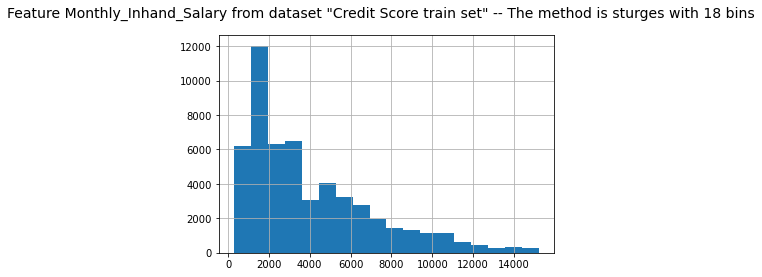

In [115]:
print_result(df_creditScore_train_withoutNan,[feature_Monthly_Inhand_Salary], dataset + " train set")

According to our solution the optimal bins size is **18** (Sturges method).

Now, let's check if this choice give a similar distribution in the test set.

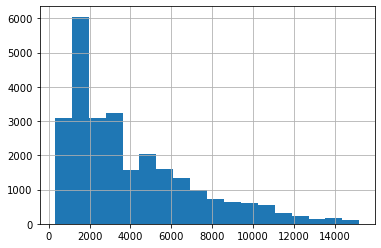

In [116]:
hi=df_creditScore_test_withoutNan.Monthly_Inhand_Salary.hist(bins=18)

If we look at the test and train histograms they look identical : so it looks like the method works well: lets check it with our metric.

XAxis(90.0,45.0)


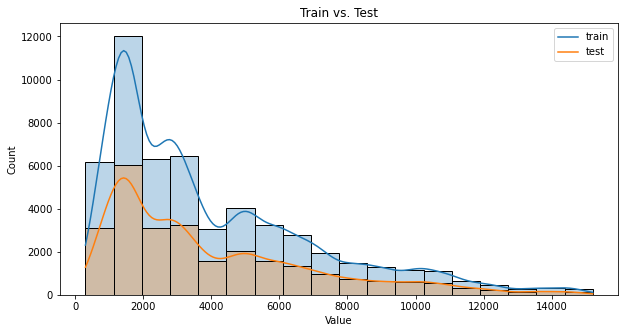

In [117]:
# hist_info= plot_dual_histogram(df, df_test, feature, bins)
h1, h2= plot_dual_histogram(df_creditScore_train_withoutNan, df_creditScore_test_withoutNan, feature_Monthly_Inhand_Salary, 18)

We see a similar behavior of the histograms of train and test.
It is good news.
Let's measure it empirically

We calculate the difference between the histograms:<br/>
We calculate the ratio of each bin against the complete data and see if the proportion of each bin in train is similar to the corresponding bin in test. We determined a threshold of 0.01 for the mean difference between a bin in train and a bin in test. Namely mean difference up to 0.01 is good for us.

In [118]:
printDifference(df_creditScore_train_withoutNan,df_creditScore_test_withoutNan,feature_Monthly_Inhand_Salary, 18)

Difference between histograms: 0.00083
The difference is below the threshold 0.01 that we set


Here we find that the proportion of each bin in train is very similar to the bin in test. In fact, we can see below that the mean difference is 0.00083.
We can compare our result to the default method of 10 bins.

Difference between histograms: 0.00079
The difference is below the threshold 0.01 that we set


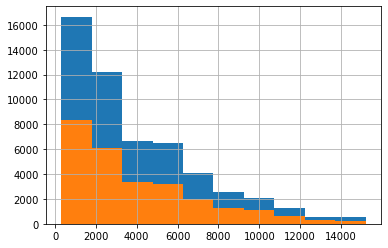

In [119]:
df_creditScore_train_withoutNan[feature_Monthly_Inhand_Salary].hist()
df_creditScore_test_withoutNan[feature_Monthly_Inhand_Salary].hist()
printDifference(df_creditScore_train_withoutNan,df_creditScore_test_withoutNan,feature_Monthly_Inhand_Salary, 10)

Just for comparison, if we were to make a histogram with the automatic bins size of hist method (=10) - the baseline approach, we would get mean difference of 0.00079 between train and test bins, below:

So, It seems that there is not difference between our approach and the baseline approach according to our meaure. But we can see that 10 bins missed the rise that exists at the beginning of data (contrary to our choice).

Now let's check our solution with another feature "Credit_Utilization_Ratio"
###Numerical feature: Credit_Utilization_Ratio

In [120]:
feature_Credit_Utilization_Ratio='Credit_Utilization_Ratio'
print(df_creditScore_train_withoutNan[feature_Credit_Utilization_Ratio].describe())

count    53049.000000
mean        32.219031
std          5.057398
min         20.881250
25%         28.046338
50%         32.251786
75%         36.408991
max         49.564519
Name: Credit_Utilization_Ratio, dtype: float64


In [121]:
utils.getFeatureInfo(df_creditScore_train_withoutNan, feature_Credit_Utilization_Ratio)

Feature name:  Credit_Utilization_Ratio
Amplitude of values: 53043.94260186163
Nb of different values in the feature:  53049
Range of values: 20.88125003902868  - 49.56451934738699
Nb of samples for this feature : 53049


Build histogram using the method

18

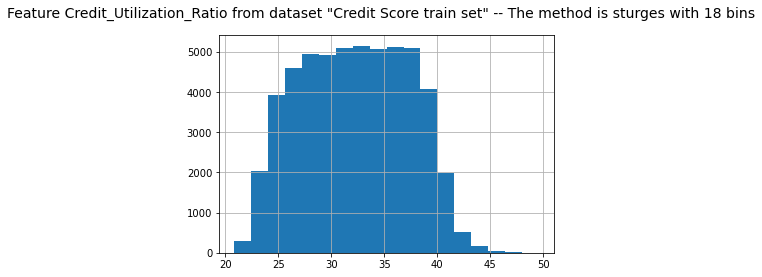

In [122]:
print_result(df_creditScore_train_withoutNan,[feature_Credit_Utilization_Ratio],"Credit Score" + " train set")

According to our solution the best bins size is 18.

Let's test if this choice (=18) is also good for the test set.
Primarily, let's see the histogram of test set with bins=18.

<AxesSubplot:>

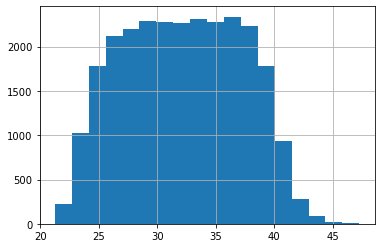

In [123]:
df_creditScore_test_withoutNan.Credit_Utilization_Ratio.hist(bins=18)

Let's see and compare the histograms of train and test

XAxis(90.0,45.0)


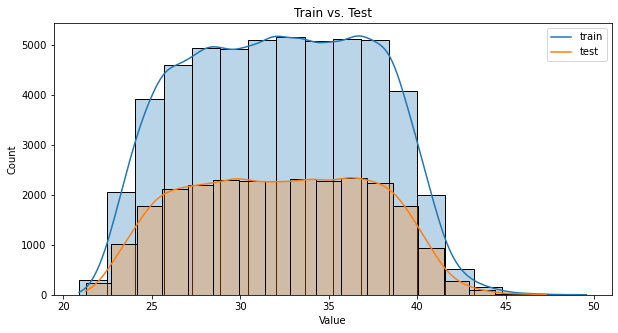

In [124]:
h1, h2= plot_dual_histogram(df_creditScore_train_withoutNan, df_creditScore_test_withoutNan, feature_Credit_Utilization_Ratio, 18)

We see a similar behavior of the histograms of train and test, also in this feature.
It is good news.
Let's measure it empirically.

In [125]:
printDifference(df_creditScore_train_withoutNan,df_creditScore_test_withoutNan,feature_Credit_Utilization_Ratio, 18)

Difference between histograms: 0.00853
The difference is below the threshold 0.01 that we set


Below, we find that the proportion of each bin in train is very similar to the bin in test. In fact, we can see below that the mean difference is 0.00853 which is very small.
Let s compare with the restlt of the default method with 10 bins

Difference between histograms: 0.01488
The difference is above the threshold 0.01 that we set


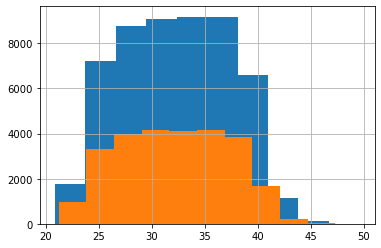

In [126]:
df_creditScore_train_withoutNan[feature_Credit_Utilization_Ratio].hist()
df_creditScore_test_withoutNan[feature_Credit_Utilization_Ratio].hist()
printDifference(df_creditScore_train_withoutNan,df_creditScore_test_withoutNan,feature_Credit_Utilization_Ratio, 10)

Just for comparison, if we were to make a histogram with the automatic bins size of hist method (=10) - the baseline approach, we would get mean difference of 0.01488 between train and test bins:

According to our measure, in this feature our solution method is better than the baseline approach which gives difference of 0.01488 - above the threshold we fixed.

We will now test the method on another dataset.
###**Second dataset**: Loan Default prediction dataset
https://www.kaggle.com/competitions/loan-default-prediction/data

In [127]:



dataset = "Loan default"

file_path_loan_default_prediction_train = ('./data/loan_default_prediction/train.csv')
df_loan_default_prediction_train= pd.read_csv(file_path_loan_default_prediction_train)

file_path_loan_default_prediction_test = ('./data/loan_default_prediction/test.csv')
df_loan_default_prediction_test= pd.read_csv(file_path_loan_default_prediction_test)

In [128]:
df_loan_default_prediction_train.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [129]:
utils.getDS_size(df_loan_default_prediction_train)

There are 35 columns
There are 67463 samples


In [130]:
utils.getDS_size(df_loan_default_prediction_test)

There are 35 columns
There are 28913 samples


We have a large dataset splitted in 70%train and 30% test.

###Numerical feature: Funded Amount Investor

In [131]:
feature_Funded_Amount_Investor='Funded Amount Investor'
print(df_loan_default_prediction_train[feature_Funded_Amount_Investor])

0        12329.36286
1        12191.99692
2        21603.22455
3        17877.15585
4        13539.92667
            ...     
67458    13175.28583
67459    15637.46301
67460    12329.45775
67461    21353.68465
67462    14207.44860
Name: Funded Amount Investor, Length: 67463, dtype: float64


In [132]:
utils.getFeatureInfo(df_loan_default_prediction_train, feature_Funded_Amount_Investor)

Feature name:  Funded Amount Investor
Amplitude of values: 66348.40979599999
Nb of different values in the feature:  67441
Range of values: 1114.590204  - 34999.74643
Nb of samples for this feature : 67463


Let's build the histogram with our method

19

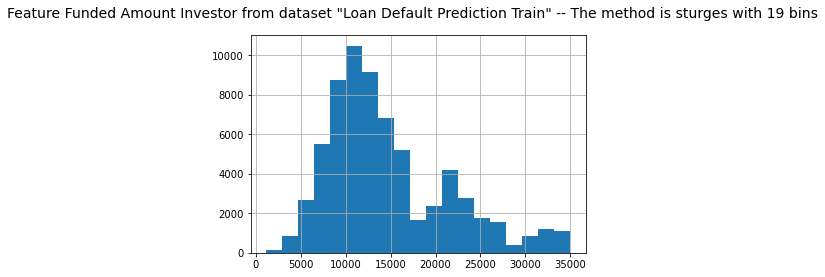

In [133]:
print_result(df_loan_default_prediction_train,[feature_Funded_Amount_Investor],"Loan Default Prediction Train")

According to our solution the best bins size is 19 (which calculated by sturges method again).

###Test the method by comparing with disribution of test set
Let's test if this choice (=19) is also good for the test set.

Primarily, let's see the histogram of test set with bins=19.

<AxesSubplot:>

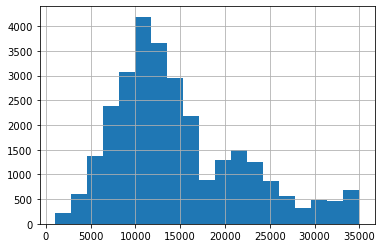

In [134]:
df_loan_default_prediction_test['Funded Amount Investor'].hist(bins=19)

Let's see and compare the histograms of train and test

XAxis(90.0,45.0)


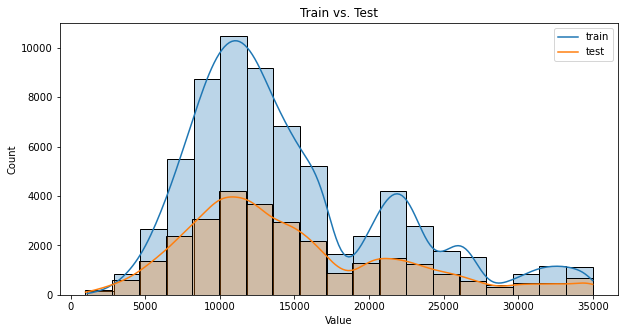

In [135]:
h1, h2= plot_dual_histogram(df_loan_default_prediction_train, df_loan_default_prediction_test, feature_Funded_Amount_Investor, 19)

We see a similar behavior of the histograms of train and test, also in this feature.
It is good news.
Let's measure it empirically.

In [136]:
printDifference(df_loan_default_prediction_train,df_loan_default_prediction_test,feature_Funded_Amount_Investor, 19)

Difference between histograms: 0.0063
The difference is below the threshold 0.01 that we set


Below, we find that the proportion of each bin in train is very similar to the bin in test. In fact, we can see below that the mean difference is 0.0063. We will check the metric on the default histogram with 10 bins.

Difference between histograms: 0.00993
The difference is below the threshold 0.01 that we set


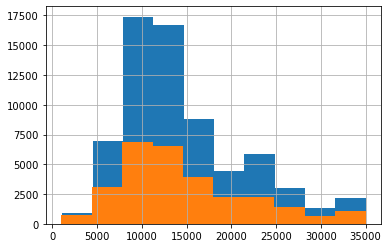

In [137]:
df_loan_default_prediction_train[feature_Funded_Amount_Investor].hist()
df_loan_default_prediction_test[feature_Funded_Amount_Investor].hist()
printDifference(df_loan_default_prediction_train,df_loan_default_prediction_test,feature_Funded_Amount_Investor, 10)

Just for comparison, if we were to make a histogram with the automatic bins size of hist method (=10) - the baseline approach, we would get mean difference of 0.00993 between train and test bins:

According to our measure, in this feature our method (which gives mean difference of 0.0063 between train and test) is more accurate than the baseline approach which gives mean difference of 0.00993 which is close to the threshold of 0.01 .


###Numerical feature : Debit to Income

In [138]:
feature_Debit_to_Income='Debit to Income'
print(df_loan_default_prediction_train[feature_Debit_to_Income].describe())

count    67463.000000
mean        23.299241
std          8.451824
min          0.675299
25%         16.756416
50%         22.656658
75%         30.048400
max         39.629862
Name: Debit to Income, dtype: float64


In [139]:
utils.getFeatureInfo(df_loan_default_prediction_train, feature_Debit_to_Income)

Feature name:  Debit to Income
Amplitude of values: 67462.324700914
Nb of different values in the feature:  67454
Range of values: 0.675299086  - 39.62986189
Nb of samples for this feature : 67463


Build histogram with our method

19

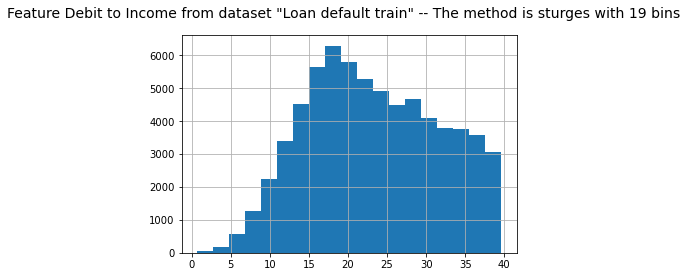

In [140]:
print_result(df_loan_default_prediction_train,[feature_Debit_to_Income], dataset + " train")

According to our solution the best bins size is 19 (which calculated by sturges method again).


###Test the method with test set
let's test if this choice (=19) is also good for the test set.

Primarily, let's see the histogram of test set with bins=19.

<AxesSubplot:>

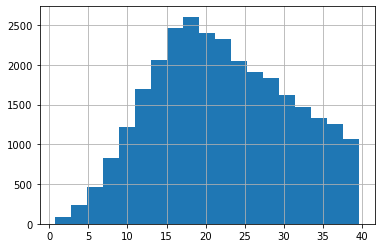

In [141]:
df_loan_default_prediction_test['Debit to Income'].hist(bins=19)

Let's see and compare the histograms of train and test

XAxis(90.0,45.0)


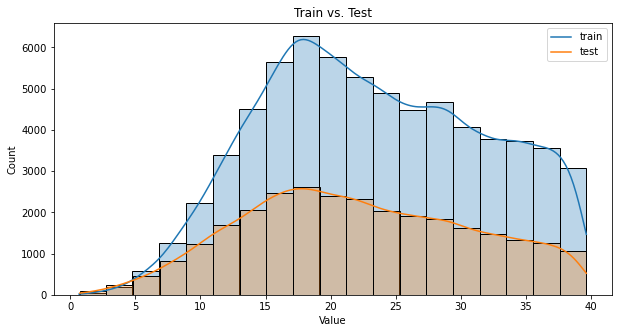

In [142]:
h1, h2= plot_dual_histogram(df_loan_default_prediction_train, df_loan_default_prediction_test, feature_Debit_to_Income, 19)

We see a similar behavior of the histograms of train and test, also in this feature.
It is good news.
Let's measure it empirically

In [143]:
printDifference(df_loan_default_prediction_train,df_loan_default_prediction_test,feature_Debit_to_Income, 19)

Difference between histograms: 0.00535
The difference is below the threshold 0.01 that we set


Below, we find that the proportion of each bin in train is very similar to the bin in test. In fact, we can see below that the mean difference is 0.00535.
Comparison with default method:

Difference between histograms: 0.00961
The difference is below the threshold 0.01 that we set


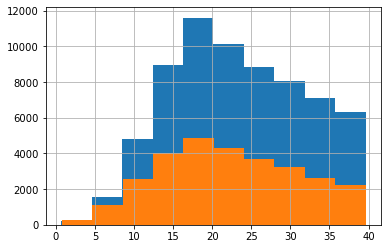

In [144]:
df_loan_default_prediction_train[feature_Debit_to_Income].hist()
df_loan_default_prediction_test[feature_Debit_to_Income].hist()
printDifference(df_loan_default_prediction_train,df_loan_default_prediction_test,feature_Debit_to_Income, 10)

- default method : difference is 0.0096
- our method :difference is 0.005

According to ourmetric, our method (which gives mean difference of 0.00535 between train and test) is better (less difference between train and test) than the baseline approach which gives mean difference of 0.00961 which is close to the threshold we determined 0.01 .

# Third dataset : iris flower and feature sepal width

9

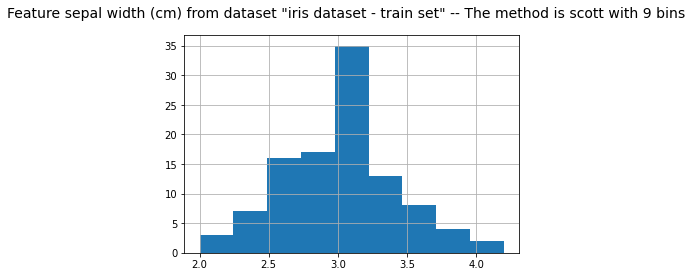

In [145]:
data, target = sklearn.datasets.load_iris(return_X_y=True, as_frame=True)
X_train,X_test,y_train,y_test=train_test_split(data,target,test_size=0.3,random_state=42)
print_result(X_train,["sepal width (cm)"], "iris dataset - train set")

XAxis(90.0,45.0)


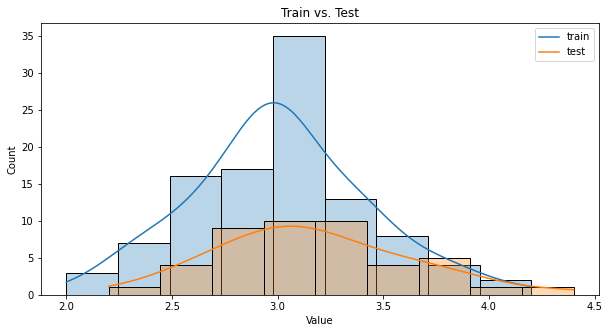

In [146]:
h1, h2= plot_dual_histogram(X_train, X_test,"sepal width (cm)", 9)

In [147]:
printDifference(X_train,X_test,"sepal width (cm)", 9)

Difference between histograms: 0.03739
The difference is above the threshold 0.01 that we set


Difference between histograms: 0.02984
The difference is above the threshold 0.01 that we set


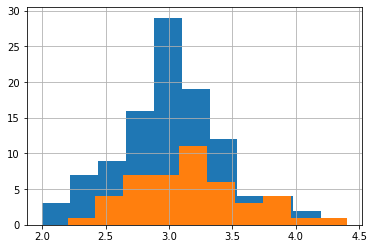

In [148]:
X_train["sepal width (cm)"].hist()
X_test["sepal width (cm)"].hist()
printDifference(X_train,X_test,"sepal width (cm)", 10)

For this feature, the default method is prefeferable because 10 bins give less difference between test and train set.

# Fourth dataset: wine data set and alcohol feature

In [149]:
data, target = sklearn.datasets.load_wine(return_X_y=True, as_frame=True)
data, target = shuffle(data, target)
X_train,X_test,y_train,y_test=train_test_split(data,target,test_size=0.3)
X_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
95,12.47,1.52,2.20,19.0,162.0,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937.0
67,12.37,1.17,1.92,19.6,78.0,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510.0
39,14.22,3.99,2.51,13.2,128.0,3.00,3.04,0.20,2.08,5.10,0.89,3.53,760.0
10,14.10,2.16,2.30,18.0,105.0,2.95,3.32,0.22,2.38,5.75,1.25,3.17,1510.0
104,12.51,1.73,1.98,20.5,85.0,2.20,1.92,0.32,1.48,2.94,1.04,3.57,672.0


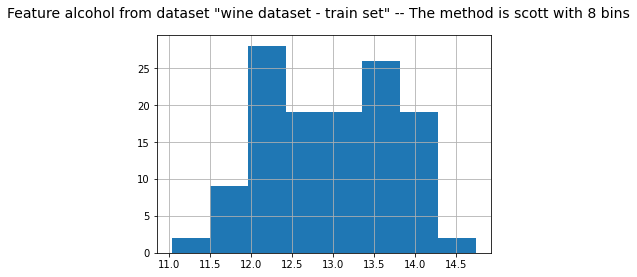

In [150]:
b= print_result(X_train,["alcohol"], "wine dataset - train set")

XAxis(90.0,45.0)


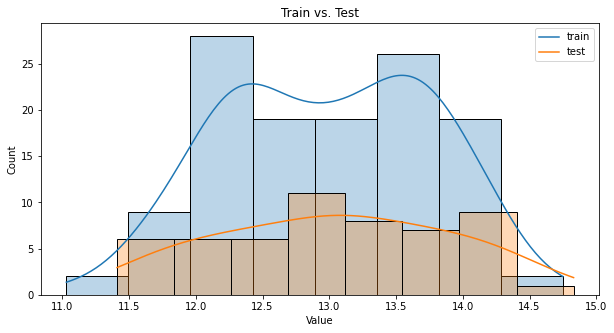

In [151]:
h1, h2= plot_dual_histogram(X_train, X_test,"alcohol", b)

In [152]:
printDifference(X_train,X_test,"alcohol", b)

Difference between histograms: 0.04996
The difference is above the threshold 0.01 that we set


Difference between histograms: 0.03369
The difference is above the threshold 0.01 that we set


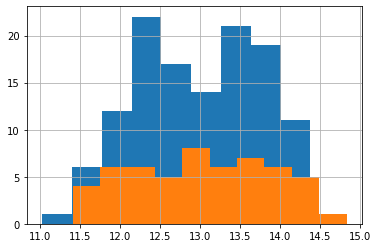

In [153]:
X_train["alcohol"].hist()
X_test["alcohol"].hist()
printDifference(X_train,X_test,"alcohol", 10)

- with 10 bins default: difference is 0.04564
- our method : differeence 0.044
So results are similar between the two methods

# Conclusions From the Tests Above

It seems that our approach/solution gives us better results of histograms than those of the baseline approach of matplotlib library function (bins=10).


 In addition, the method propose smooth histogram which are easy to read by the dta analyst and can understan the general distribution of the data.